In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from sympy.stats import *

In [2]:
mu, sig = symbols(r"\mu \sigma", positive=True)

# for a log normal distribution, LogNormal**(1/2) is also LogNormal!
# https://stats.stackexchange.com/questions/641238/expected-value-of-the-square-root-of-a-lognormal-variable
sqrt_parms = {mu: mu / 2, sig: sig / 2}
X = LogNormal("X", mu, sig)
Y = LogNormal("Y", sqrt_parms[mu], sqrt_parms[sig])

In [3]:
rho = Expectation(X) ** 2 / Variance(X) / 2
rho_orig = rho.subs(X, X)
rho_new = rho.subs(X, Y)
rho_increase = rho_new / rho_orig
rho_increase

Expectation(Y)**2*Variance(Y)**(-1)*(Expectation(X)**2*Variance(X)**(-1))**(-1)

In [4]:
# sympy's LogNormal is broken, so we do it ourselves
E_lognorm = exp(mu + sig**2 / 2)
Var_lognorm = exp(2 * mu + sig**2) * (exp(sig**2) - 1)

rho_increase_subs = rho_increase.subs(
    {
        Expectation(X): E_lognorm,
        Expectation(Y): E_lognorm.subs(sqrt_parms),
        Variance(X): Var_lognorm,
        Variance(Y): Var_lognorm.subs(sqrt_parms),
    }
)
rho_increase_subs = simplify(rho_increase_subs)
rho_increase_subs

(1 - exp(\sigma**2))/(1 - exp(\sigma**2/4))

Text(0, 0.5, 'multiplicative increase in complexity')

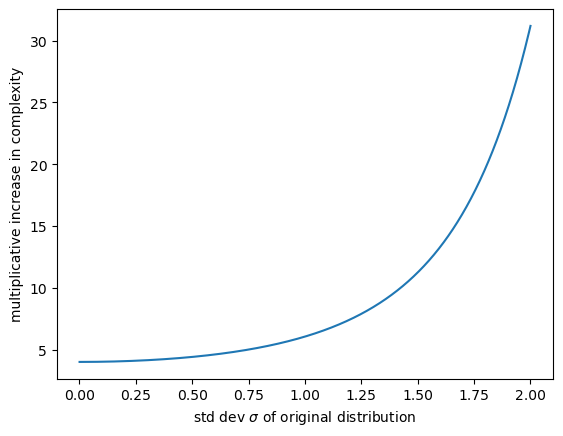

In [5]:
delta = lambdify(sig, rho_increase_subs, "numpy")
x = np.linspace(0.001, 2, 1000)
plt.plot(x, delta(x))
# plt.loglog();
plt.xlabel(r"std dev $\sigma$ of original distribution")
plt.ylabel(r"multiplicative increase in complexity")

Text(0, 0.5, 'multiplicative increase in complexity')

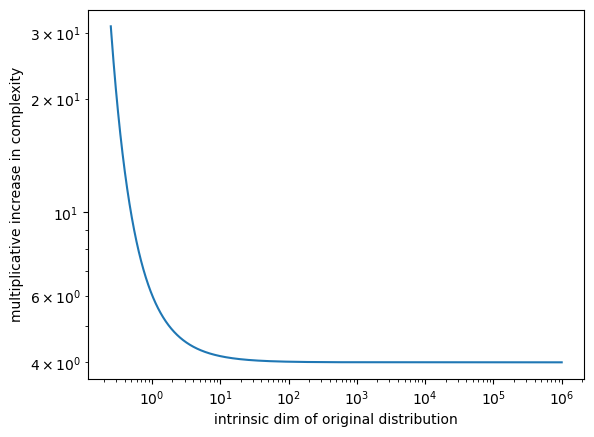

In [6]:
plt.plot(1 / x**2, delta(x))
plt.loglog()
plt.xlabel(r"intrinsic dim of original distribution")
# Heikel, wir wissen ja nicht, was mit \mu passiert!
plt.ylabel(r"multiplicative increase in complexity")